# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Deswita Marsya Nadia
- **Email:** deswitamarsyan@gmail.com
- **ID Dicoding:** marsyanadia

## Menentukan Pertanyaan Bisnis

- Secara keseluruhan, pada musim apa penyewaan sepeda banyak diminati?
- Apakah ada peningkatan jumlah peminjam dari tahun ke tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling
Memuat data set yang terdapat pada folder dataset.

### Gathering Data

In [2]:
df = pd.read_csv("dataset/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data
Untuk menghindari masalah dalam data, dilakukan pengecekan terlebih dahulu. Pengecekan meliputi:
- Missing value
- Duplicate data
- Data type

#### Memeriksa Missing Values

In [3]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat dilihat dari hasil di atas bahwa tidak ada missing values di setiap kolom.

#### Memeriksa Duplicate Data

In [4]:
df.duplicated().sum()

0

Hasil menampilkan 0 yang berarti tidak ada duplicated data di dalam data.

#### Memeriksa Tipe Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tipe data dari **dteday** masih berupa objek, di mana sebaiknya diganti menjadi tipe data date.

### Cleaning Data

In [6]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%Y-%m-%d')
print(df['dteday'].dtype)

datetime64[ns]


Tipe data dari **dteday** sudah berhasil diubah.

#### Mengubah Nama Column
Untuk meningkatkan readability, akan diubah beberapa nama column menjadi seperti berikut:
- dteday = date
- yr = year
- mnth = month
- cnt = count

In [7]:

df.rename(columns={'dteday': 'date',
                   'yr': 'year',
                   'mnth': 'month',
                   'cnt': 'count'},
            inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

Semua nama column sudah terganti.

In [9]:
df.to_csv('dashboard/clean_bike_share_data.csv', index=False)

Simpan data yang sudah dibersihkan ke dalam folder dashboard

## Exploratory Data Analysis (EDA)

### Seasonal Data

In [10]:
seasonal_data = df[['season', 'casual', 'registered', 'count']]
seasonal_data

,season,casual,registered,count
0,1,331,654,985
1,1,131,670,801
2,1,120,1229,1349
3,1,108,1454,1562
4,1,82,1518,1600
...,...,...,...,...
726,1,247,1867,2114
727,1,644,2451,3095
728,1,159,1182,1341
729,1,364,1432,1796


Melihat jumlah baris dan kolom.

In [11]:
seasonal_sum = seasonal_data.groupby('season').sum()
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_sum.index = seasons

seasonal_sum

,casual,registered,count
Spring,60622,410726,471348
Summer,203522,715067,918589
Fall,226091,835038,1061129
Winter,129782,711831,841613


Kode di atas mengambil data frame yang hanya berisi season, casual, registered, dan count. DataFrame akan dikelompokkan berdasarkan season dan dihitung jumlahnya. 

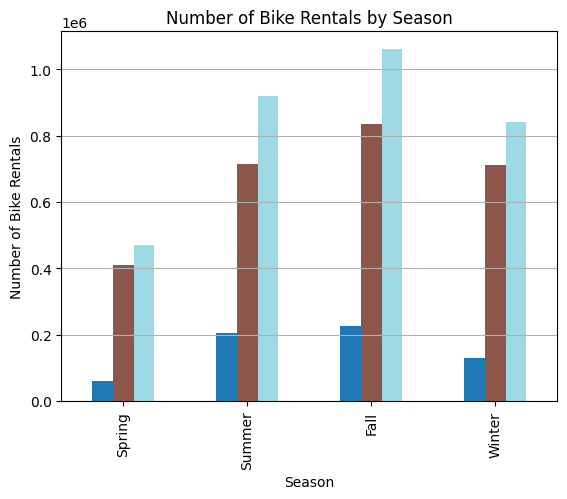

In [12]:
seasonal_sum.plot(kind='bar', legend=False, cmap='tab20')
plt.title('Number of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals')
plt.grid(axis='y')
plt.show()

Diagram di atas menampilkan jumlah dari peminjam casual, registered, dan total peminjam berdasarkan musim.

#### Yearly Data

In [13]:
yearly_data = df[['year', 'count']]
yearly_data


,year,count
0,0,985
1,0,801
2,0,1349
3,0,1562
4,0,1600
...,...,...
726,1,2114
727,1,3095
728,1,1341
729,1,1796


Mengambil kolom year dan count dari DataFrame

In [14]:
yearly_trends = yearly_data.groupby('year').sum()
yearly_trends

,count
year,
0,1243103
1,2049576


Menjumlahkan peminjam sepeda secara keseluruhan.

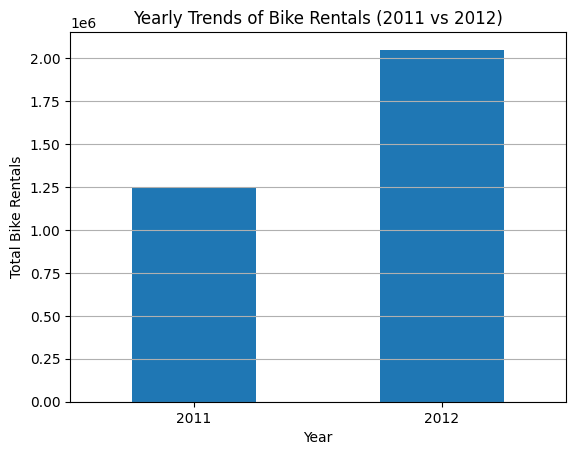

In [15]:
yearly_trends.plot(kind='bar', legend=False)
plt.title('Yearly Trends of Bike Rentals (2011 vs 2012)')
plt.xlabel('Year')
plt.ylabel('Total Bike Rentals')
plt.xticks(ticks=[0, 1], labels=['2011', '2012'], rotation=0)
plt.grid(axis='y')
plt.show()

Diagram di atas menggambarkan jumlah peminjaman dari tahun ke tahun.

## Visualization & Explanatory Analysis

### Pertanyaan 1: 
Secara keseluruhan, pada musim apa penyewaan sepeda banyak diminati?

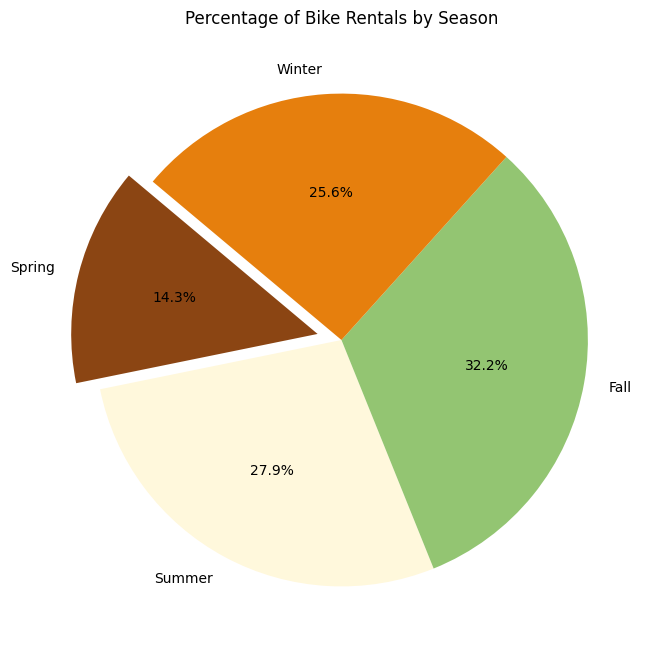

In [16]:
total_rentals = seasonal_sum['count'].sum()
proportions = seasonal_sum['count'] / total_rentals
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = (0.1, 0, 0, 0)


plt.figure(figsize=(8, 8))
plt.pie(
    proportions, 
    labels=seasonal_sum.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode
)
plt.title('Percentage of Bike Rentals by Season')
plt.show()


Diagram di atas menampilkan berapa persentase peminjaman sepeda dari seluruh jumlah pengguna casual dan registered di setiap musim.

### Pertanyaan 2:
Apakah ada peningkatan jumlah peminjam dari tahun ke tahun?

In [17]:
yearly_trends['growth_percentage'] = yearly_trends['count'].pct_change() * 100

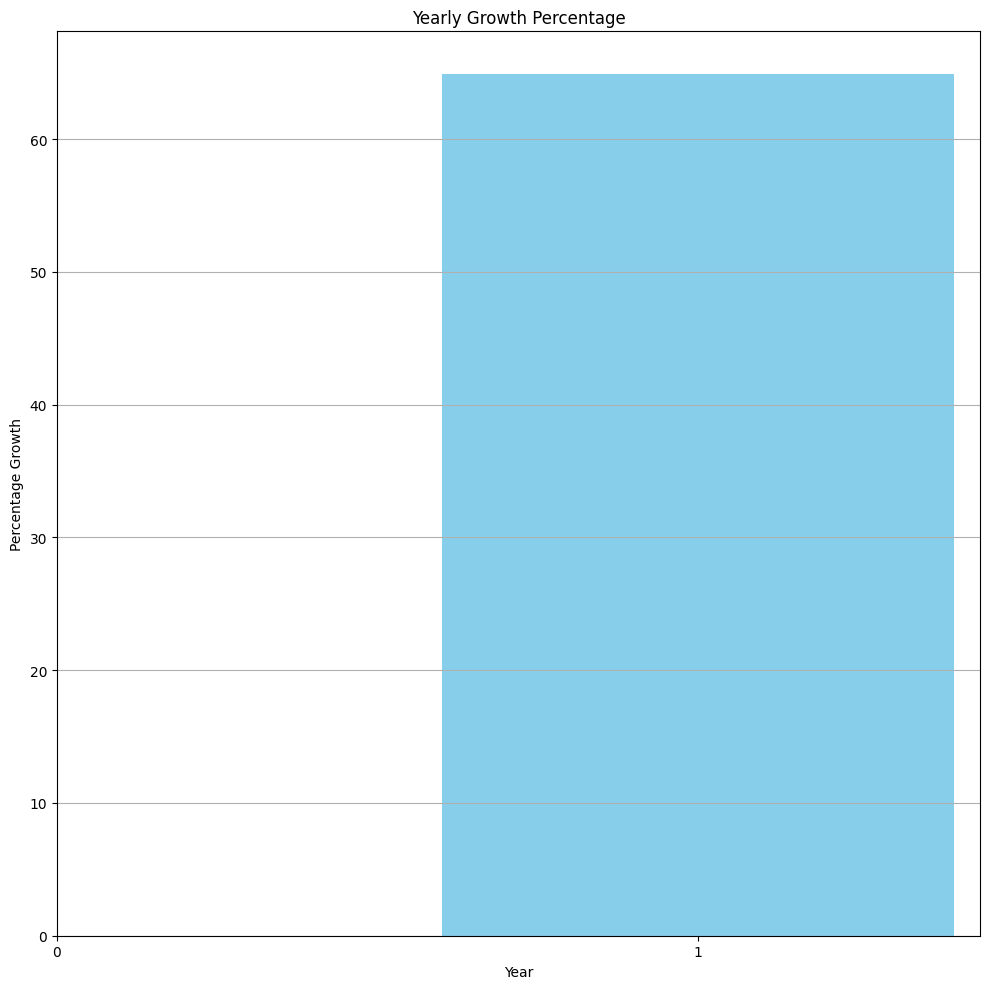

In [18]:
plt.figure(figsize=(10, 10))
plt.bar(yearly_trends.index, yearly_trends['growth_percentage'], color='skyblue')
plt.title('Yearly Growth Percentage')
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.grid(axis='y')
plt.xticks(yearly_trends.index)
plt.tight_layout()
plt.show()


Membuat diagram dari data tahunan jumlah peminjam sepeda.

## Conclusion

- Dari diagram di atas dapat disimpulkan bahwa terdapat perbedaan jumlah peminjaman sepeda di setiap musim. Diagram tersebut menunjukkan bahwa secara keseluruhan, peminjaman sepeda berada di puncaknya pada saat musim gugur (32.2%), dan presentase peminjaman terendahnya ada di musim semi (14.3%).
- Dari diagram di atas dapat disimpulkan bahwa dari tahun 2011 ke 2012 (1 tahun), terdapat kenaikan jumlah peminjam sepeda. Peminjam tersebut sudah termasuk peminjam casual dan registered. Jadi, dari diagram tersebut didapatkan informasi bahwa jumlah peminjaman sepeda meningkat sebanyak lebih dari 60% dalam kurun waktu satu tahun. 